In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('Market_Basket.csv')
df

C:\Users\sohan\AppData\Local\Temp\ipykernel_13844\1252313576.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Market_Basket.csv')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
df.shape

(522064, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [5]:
df.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

As we can see the Itemname and the Customer ID has null. Since we dont need customer Id it is not a relevant column so we I will drop this column 

In [6]:
df = df.drop(columns='CustomerID')

In [7]:
df

,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


In [8]:
uk_df = df[df['Country'] == 'United Kingdom']




In [9]:
# Group data by 'Itemname' and count occurrences
item_counts = uk_df['Itemname'].value_counts()


In [10]:
top_n = 10
top_items = item_counts.head(top_n)

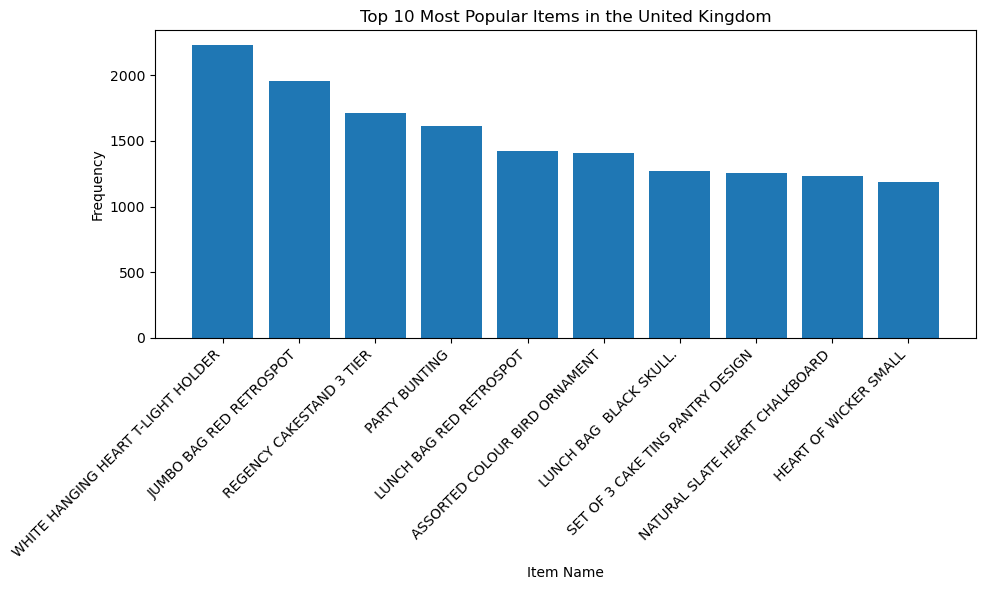

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.bar(top_items.index, top_items.values)
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Popular Items in the United Kingdom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As you can see the top 10 items popular in United Kingdom

In [12]:
item_prices = uk_df.groupby('Itemname')['Price'].sum()

In [13]:
most_expensive_item = item_prices.idxmax()

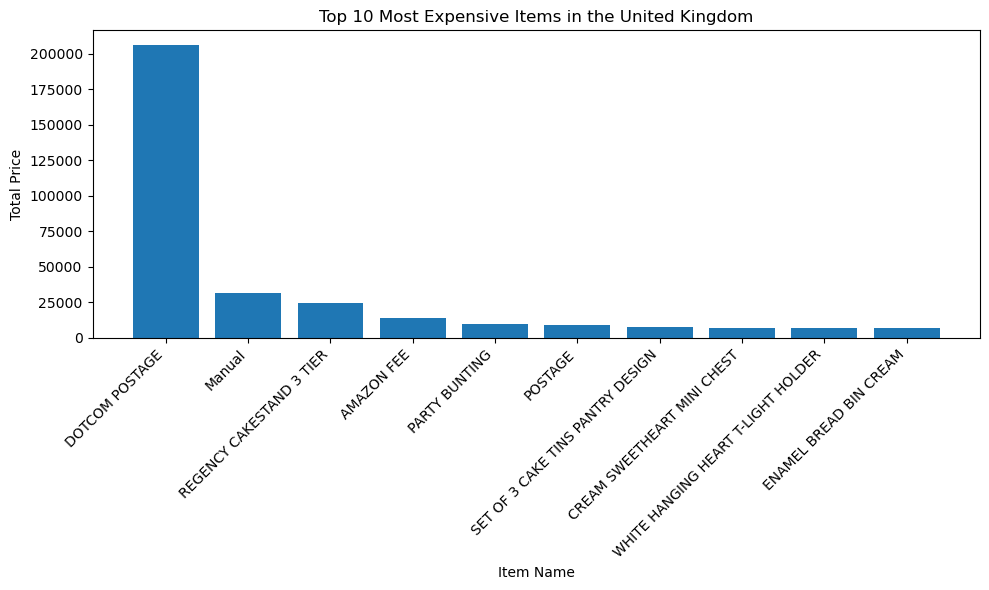

In [14]:

top_n = 10
top_items_prices = item_prices.nlargest(top_n)

plt.figure(figsize=(10, 6))
plt.bar(top_items_prices.index, top_items_prices.values)
plt.xlabel('Item Name')
plt.ylabel('Total Price')
plt.title(f'Top {top_n} Most Expensive Items in the United Kingdom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Handling the missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BillNo    522064 non-null  object 
 1   Itemname  520609 non-null  object 
 2   Quantity  522064 non-null  int64  
 3   Date      522064 non-null  object 
 4   Price     522064 non-null  float64
 5   Country   522064 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 23.9+ MB


Here itemname is missing so we will remove the row from the dataset

In [16]:
df.dropna(subset=['Itemname'], inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520609 entries, 0 to 522063
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   BillNo    520609 non-null  object 
 1   Itemname  520609 non-null  object 
 2   Quantity  520609 non-null  int64  
 3   Date      520609 non-null  object 
 4   Price     520609 non-null  float64
 5   Country   520609 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.8+ MB


In [18]:
df.describe(include = 'all')

,BillNo,Itemname,Quantity,Date,Price,Country
count,520609.0,520609,520609.000000,520609,520609.000000,520609
unique,20210.0,4185,NaN,18670,NaN,30
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,United Kingdom
freq,1114.0,2269,NaN,1114,NaN,486167
mean,NaN,NaN,10.145545,NaN,3.837497,NaN
std,NaN,NaN,160.818639,NaN,41.958621,NaN
min,NaN,NaN,-9600.000000,NaN,-11062.060000,NaN
25%,NaN,NaN,1.000000,NaN,1.250000,NaN
50%,NaN,NaN,3.000000,NaN,2.080000,NaN
75%,NaN,NaN,10.000000,NaN,4.130000,NaN


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: Itemname, Length: 4185, dtype: int64

In [21]:
df['Country'].value_counts()

United Kingdom          486167
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

So there are many countries but i will be focusing on Unitead Kingdom

In [22]:

df_uk = df[df["Country"] == "United Kingdom"]
df_uk

,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,United Kingdom
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,United Kingdom
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,United Kingdom
522047,581586,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,United Kingdom


In [23]:
df_uk.shape


(486167, 6)

Dropping the data which is negative and zero quantity

In [24]:
#df_uk=df_uk.loc[df_uk['Quantity']>0]


In [25]:
df_uk

,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,United Kingdom
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,United Kingdom
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,United Kingdom
522047,581586,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,United Kingdom


In [26]:
#df_uk=df_uk.loc[df_uk['Price']>0]

In [27]:
df_uk 

,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,09-12-2011 12:31,1.95,United Kingdom
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,8,09-12-2011 12:49,2.95,United Kingdom
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,09-12-2011 12:49,1.25,United Kingdom
522047,581586,RED RETROSPOT ROUND CAKE TINS,24,09-12-2011 12:49,8.95,United Kingdom


In [28]:
basket = df_uk.groupby(["BillNo","Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo")

In [29]:
basket

Itemname,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A563185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
def one_hot_encoding(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket = basket.applymap(one_hot_encoding)

This is code for anything less than zero is set to be zero and anything greater than zero is set to be 1

In [31]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [32]:
#frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

C:\Users\sohan\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
frequent_itemsets

,support,itemsets
0,0.023408,(3 STRIPEY MICE FELTCRAFT)
1,0.021105,(4 TRADITIONAL SPINNING TOPS)
2,0.045798,(6 RIBBONS RUSTIC CHARM)
3,0.031121,(60 CAKE CASES VINTAGE CHRISTMAS)
4,0.040334,(60 TEATIME FAIRY CAKE CASES)
...,...,...
364,0.021640,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI..."
365,0.028282,"(WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR..."
366,0.026407,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
367,0.021694,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKAD..."


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [35]:
rules = rules.sort_values("lift", ascending = False)

In [36]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
166,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029246,0.050029,0.026407,0.902930,18.047974,0.024944,9.786489,0.973050
164,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030907,0.051261,0.026407,0.854419,16.667875,0.024823,6.516930,0.969983
27,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037656,0.050029,0.030907,0.820768,16.405696,0.029023,5.300232,0.975790
170,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.027050,0.103808,0.021694,0.801980,7.725577,0.018886,4.525767,0.894763
146,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037656,0.051261,0.029246,0.776671,15.151179,0.027316,4.248173,0.970545
...,...,...,...,...,...,...,...,...,...,...
181,(JUMBO BAG RED RETROSPOT),"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",0.103808,0.027479,0.020569,0.198142,7.210762,0.017716,1.212835,0.961087
136,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD),0.116021,0.065295,0.021962,0.189289,2.898964,0.014386,1.152944,0.741024
160,(WHITE HANGING HEART T-LIGHT HOLDER),(WOODEN PICTURE FRAME WHITE FINISH),0.116021,0.057636,0.021640,0.186519,3.236173,0.014953,1.158434,0.781685
145,(WHITE HANGING HEART T-LIGHT HOLDER),(PARTY BUNTING),0.116021,0.085382,0.020247,0.174515,2.043930,0.010341,1.107977,0.577781


In [37]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PACK OF 72 RETROSPOT CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.060475,0.040334,0.021908,0.362267,8.981636,0.019469,1.504809,0.945862
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.040334,0.060475,0.021908,0.543161,8.981636,0.019469,2.056577,0.926012
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049815,0.046923,0.030157,0.605376,12.901565,0.027819,2.415155,0.970853
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046923,0.049815,0.030157,0.642694,12.901565,0.027819,2.659303,0.967907
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.035138,0.049815,0.021051,0.599085,12.026156,0.019301,2.370043,0.950238
...,...,...,...,...,...,...,...,...,...,...
177,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",(JUMBO STORAGE BAG SUKI),0.035192,0.060528,0.020569,0.584475,9.656249,0.018439,2.260927,0.929138
178,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",(JUMBO SHOPPER VINTAGE RED PAISLEY),0.037388,0.060689,0.020569,0.550143,9.064982,0.018300,2.088023,0.924241
179,(JUMBO SHOPPER VINTAGE RED PAISLEY),"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",0.060689,0.037388,0.020569,0.338923,9.064982,0.018300,1.456127,0.947168
180,(JUMBO STORAGE BAG SUKI),"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.060528,0.035192,0.020569,0.339823,9.656249,0.018439,1.461438,0.954196


In [38]:
rules[(rules['confidence']>0.8) & (rules['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037656,0.050029,0.030907,0.820768,16.405696,0.029023,5.300232,0.975790
164,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.030907,0.051261,0.026407,0.854419,16.667875,0.024823,6.516930,0.969983
166,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029246,0.050029,0.026407,0.902930,18.047974,0.024944,9.786489,0.973050
170,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.027050,0.103808,0.021694,0.801980,7.725577,0.018886,4.525767,0.894763


In [39]:
filtered_rules  = rules[(rules['confidence']>0.8) & (rules['lift']>2)]

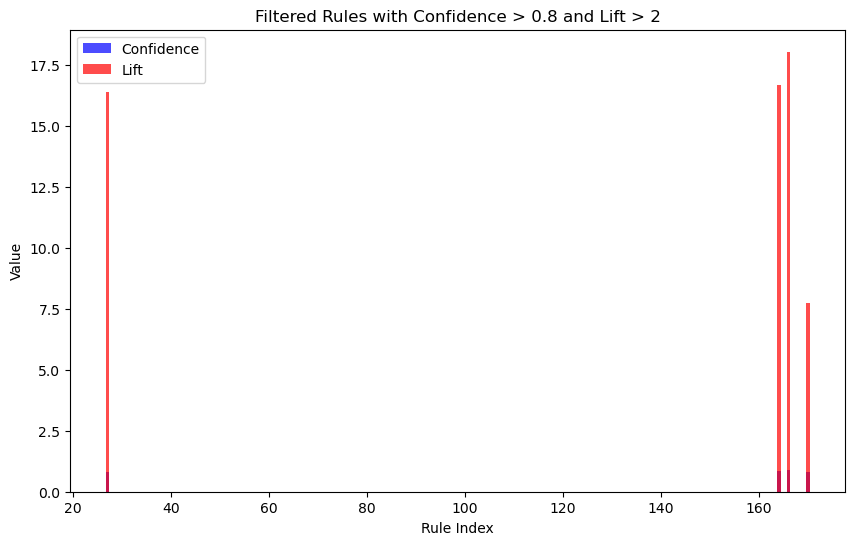

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(filtered_rules.index, filtered_rules['confidence'], label='Confidence', color='b', alpha=0.7)
plt.bar(filtered_rules.index, filtered_rules['lift'], label='Lift', color='r', alpha=0.7)
plt.xlabel('Rule Index')
plt.ylabel('Value')
plt.title('Filtered Rules with Confidence > 0.8 and Lift > 2')
plt.legend()
plt.show()
